# Seasonality and Naive Forecast for UK

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig


In [2]:
uk_processed_dir = "../data/uk/processed/"

In [3]:
df = pd.read_csv(f'{uk_processed_dir}full_preprocessed.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [4]:
df

,wind_speed,power
timestamp,,
2020-01-01 00:00:00,3.887291,150.984141
2020-01-01 00:10:00,3.848941,130.414782
2020-01-01 00:20:00,4.043625,146.401656
2020-01-01 00:30:00,3.330342,84.296224
2020-01-01 00:40:00,3.388536,94.994105
...,...,...
2017-12-31 23:10:00,12.171247,2053.752441
2017-12-31 23:20:00,12.940699,2059.465576
2017-12-31 23:30:00,12.129325,2054.284912


## Exploring seasonality across years/months/weeks/days

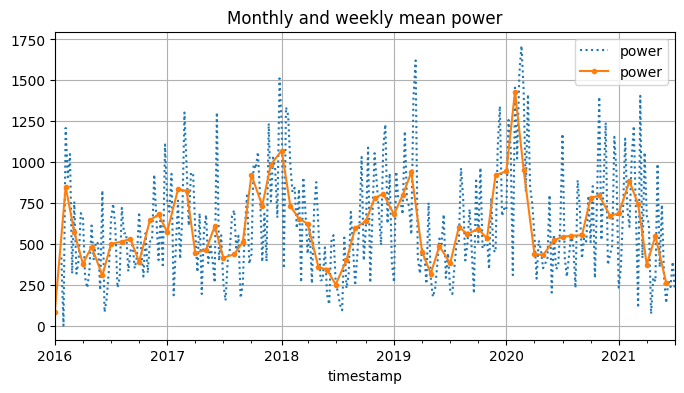

In [6]:
# resample power data to monthly, weekly
power_df_monthly = df[["power"]].resample('M').mean()
power_df_weekly = df[["power"]].resample('W').mean()
fig, ax = plt.subplots(figsize=(8, 4))
power_df_weekly.plot(ax=ax, grid=True, legend=True, title="Monthly and weekly mean power", linestyle=":")
power_df_monthly.plot(ax=ax, grid=True, legend=True, marker=".")
savefig("./plots/mean_power_series.png")

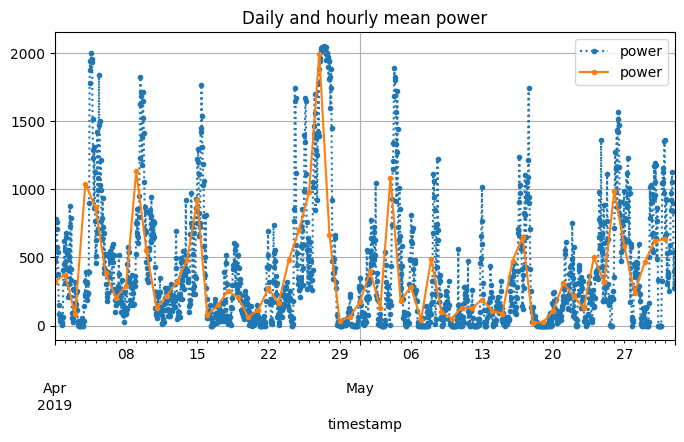

In [25]:
# resample power data to daily, hourly
month_period = slice("04-2019", "05-2019")
power_df_daily = df[["power"]].resample('D').mean()
power_df_hourly = df[["power"]].resample('H').mean()

# Seems to be no daily or hourly seasonality
fig, ax = plt.subplots(figsize=(8, 4))
power_df_hourly[month_period].plot(ax=ax, grid=True, legend=True, marker=".", title="Daily and hourly mean power", linestyle=":")
power_df_daily[month_period].plot(ax=ax, grid=True, legend=True, marker=".")
savefig("./plots/daily_mean_power_series.png")

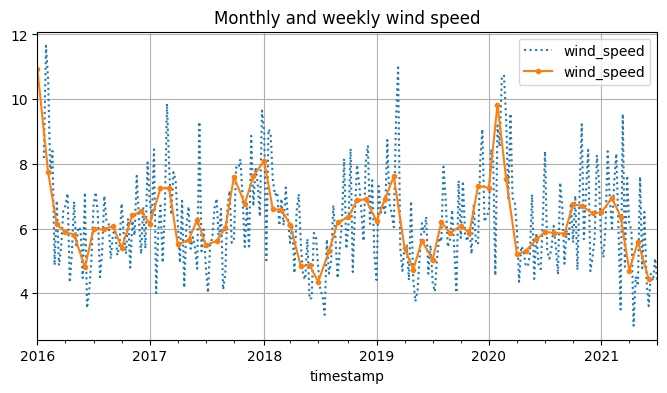

In [7]:
# resample wind speed data to monthly and weekly
period = slice("2016", "2021")
wind_speed_df_monthly = df[["wind_speed"]].resample('M').mean()  # compute the mean for each month
wind_speed_df_weekly = df[["wind_speed"]].resample('W').mean()  # compute the mean for each week

fig, ax = plt.subplots(figsize=(8, 4))
wind_speed_df_weekly[period].plot(ax=ax, linestyle=":", title="Monthly and weekly wind speed")
wind_speed_df_monthly[period].plot(ax=ax, marker=".", grid=True)
savefig("./plots/mean_wind_speed_series.png")


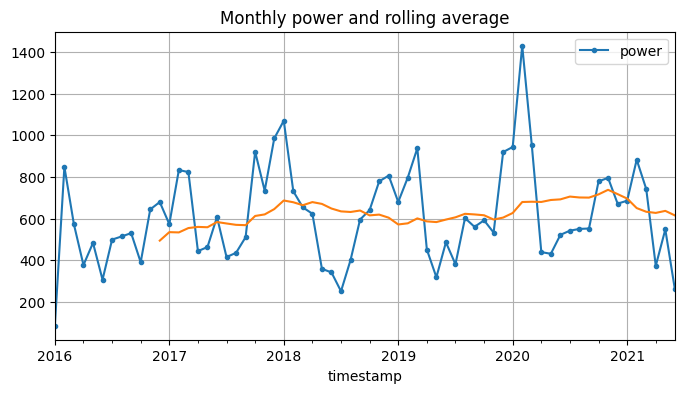

In [8]:
rolling_average_12_months = power_df_monthly.rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(8, 4))
power_df_monthly.plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False, title="Monthly power and rolling average")
savefig("./plots/power_rolling_avg_1_year.png")


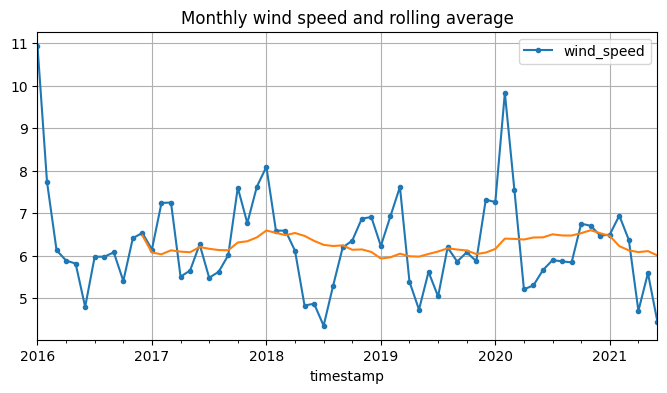

In [9]:
rolling_average_12_months = wind_speed_df_monthly.rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(8, 4))
wind_speed_df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False, title="Monthly wind speed and rolling average")
savefig("./plots/wind_speed_rolling_avg_1_year.png")

There seems to be a yearly seasonality for power and wind speed (meaning there is less power produced and slower wind during summer months, and more power and faster wind during winter). The average power and wind speed seem to be rather constant during the years. Let's see how a naive forecast performs by simply shifting the power of one year into the next year.

Mean absolute error: 179.37
Root mean squared error: 233.50543890881858
Mean absolute percentage error: 28.52%


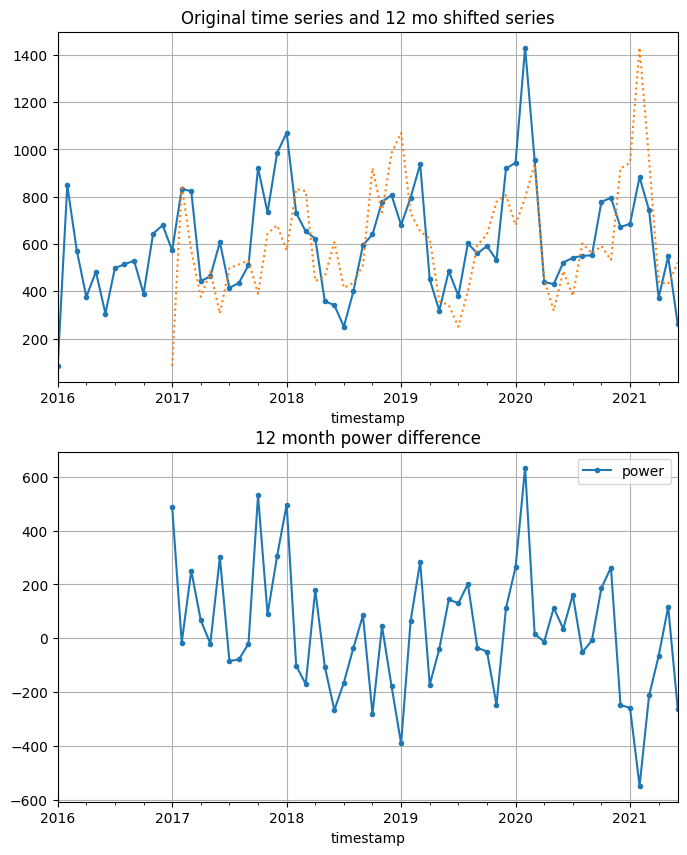

In [26]:
# plot yearly difference in power
power_df_diff = power_df_monthly.diff(12) # 12 mo difference

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
power_df_monthly.plot(ax=axs[0], grid=True, legend=False, marker=".", title="Original time series and 12 mo shifted series")  # original time series
power_df_monthly.shift(12).plot(ax=axs[0], grid=True, legend=False, linestyle=":")  # lagged
power_df_diff.plot(ax=axs[1], grid=True, marker=".", title="12 month power difference")  # 12 mo difference time series
savefig("./plots/power_diff_plot.png")

# rather huge difference by simply shifting the time series by 12 months (naive forecast)
print(f"Mean absolute error: {power_df_diff.abs().mean()[0].round(2)}")
print(f"Root mean squared error: {math.sqrt(power_df_diff.pow(2).mean()[0].round(2))}")
print(f"Mean absolute percentage error: {(power_df_diff / power_df_monthly).abs().mean()[0].round(4) * 100}%")

The naive forecast achieves a MAE of 179.37 and RMSE of 233.51. However, the horizon might not be suitable as we take the monthly average here. Predicting with the naive forecast is really basic, not that good and thus is not recommended. Let's see how different ML models perform.